In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Loading the data
df=pd.read_csv('parkingLot (1).csv')

In [47]:
df

,vehicle_no,timestamp,camera_id
0,MHUN7063,2024-09-12 05:00:00,1
1,MHYN4677,2024-09-12 05:00:00,1
2,MHEL6595,2024-09-12 05:00:00,1
3,MHNQ2590,2024-09-12 05:00:00,1
4,MHHA0518,2024-09-12 05:00:00,1
...,...,...,...
106689,MHCN7114,2024-11-14 00:00:00,2
106690,MHVY8418,2024-11-14 00:00:00,2
106691,MHSR8102,2024-11-14 00:00:00,2
106692,MHQG5264,2024-11-14 00:00:00,2


## Data Preprocessing

Presently, we are dropping the Null values from the data, and also whichever vehicle's either entry or exit was not recorded, that is also dropped for the Time Series Analysis

In [48]:
x=pd.to_datetime(df['timestamp']).tolist()

df['date'] = [timestamp.date() for timestamp in x]
dfnew=df.copy()
dfnew['timestamp'] = pd.to_datetime(dfnew['timestamp'])

# # Sort by date and vehicle number
dfnew.sort_values(by=['date', 'vehicle_no', 'timestamp'], inplace=True)
# # Calculate the time difference in seconds for matching vehicle numbers and dates
dfnew['time_diff'] = dfnew.groupby(['date', 'vehicle_no'])['timestamp'].diff().dt.total_seconds()
dfnew['time_diff'] = dfnew['time_diff'].shift(-1)
dfnew.reset_index(drop=True, inplace=True)
print(dfnew)

       vehicle_no           timestamp  camera_id        date  time_diff
0        MAIH5246 2024-09-12 15:20:00          2  2024-09-12        NaN
1        MFQO3306 2024-09-12 19:40:00          2  2024-09-12        NaN
2        MHAA7568 2024-09-12 20:00:00          1  2024-09-12    12000.0
3        MHAA7568 2024-09-12 23:20:00          2  2024-09-12        NaN
4        MHAB3880 2024-09-12 15:40:00          1  2024-09-12    16800.0
...           ...                 ...        ...         ...        ...
106689   MHSR8102 2024-11-14 00:00:00          2  2024-11-14        NaN
106690   MHTM4277 2024-11-14 00:00:00          2  2024-11-14        NaN
106691   MHUI0644 2024-11-14 00:00:00          2  2024-11-14        NaN
106692   MHVY8418 2024-11-14 00:00:00          2  2024-11-14        NaN
106693   MHYL8247 2024-11-14 00:00:00          2  2024-11-14        NaN

[106694 rows x 5 columns]


For part b, we will drop the values of time spent for those vehicles which are either NaN or could not be mapped to their entry or exit

In [49]:
dfnewer=dfnew.copy()
non_nan_indices = dfnew[dfnew['time_diff'].notna()].index

# Dropping the Null values (the vehicles which could not be matched with their entry or exit)
indices_to_drop = set(non_nan_indices + 1)
df_dropped = dfnew.drop(index=indices_to_drop)
df_dropped.reset_index(drop=True, inplace=True)
df_only_givendata=df_dropped.copy()
df_only_givendata


,vehicle_no,timestamp,camera_id,date,time_diff
0,MAIH5246,2024-09-12 15:20:00,2,2024-09-12,NaN
1,MFQO3306,2024-09-12 19:40:00,2,2024-09-12,NaN
2,MHAA7568,2024-09-12 20:00:00,1,2024-09-12,12000.0
3,MHAB3880,2024-09-12 15:40:00,1,2024-09-12,16800.0
4,MHAB7611,2024-09-12 07:00:00,1,2024-09-12,16800.0
...,...,...,...,...,...
55537,MHSR8102,2024-11-14 00:00:00,2,2024-11-14,NaN
55538,MHTM4277,2024-11-14 00:00:00,2,2024-11-14,NaN
55539,MHUI0644,2024-11-14 00:00:00,2,2024-11-14,NaN
55540,MHVY8418,2024-11-14 00:00:00,2,2024-11-14,NaN


In [50]:
timecount=0
df_dropped=df_dropped.groupby(df_dropped['date'])['time_diff'].mean().reset_index()
df_dropped.dropna(inplace=True)
df_dropped

,date,time_diff
0,2024-09-12,15155.087719
1,2024-09-13,23293.298969
2,2024-09-14,29635.842294
3,2024-09-15,32216.195122
4,2024-09-16,30246.798030
...,...,...
58,2024-11-09,18553.734940
59,2024-11-10,17161.697497
60,2024-11-11,16854.000000
61,2024-11-12,17387.692308


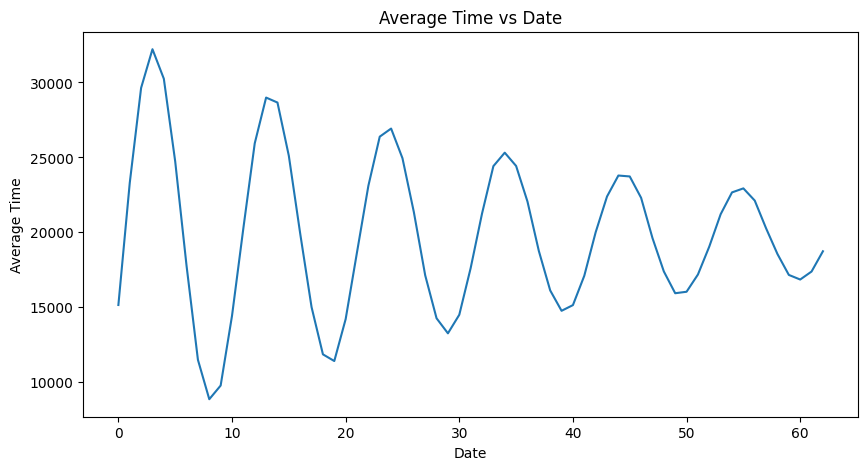

In [51]:
# Plot frequency against index of df_dropped
plt.figure(figsize=(10, 5))
plt.plot(df_dropped.index, df_dropped['time_diff'])
plt.xlabel('Date')
plt.ylabel('Average Time')
plt.title('Average Time vs Date')
plt.show()

This is the time series for which we have to do prediction.

## Analysis

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
df_new=df_dropped.copy()
result= adfuller(df_new['time_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print(df_dropped)
# # df_new=df_dropped
df_new['newdiff']=df_new['time_diff'].diff()
df_new.dropna(inplace=True)
result2 = adfuller(df_new['newdiff'])
print('ADF Statistic:', result2[0])
print('p-value:', result2[1])
df_new
# # plt.show()

ADF Statistic: -1.6295451881700742
p-value: 0.46772878896293446
          date     time_diff
0   2024-09-12  15155.087719
1   2024-09-13  23293.298969
2   2024-09-14  29635.842294
3   2024-09-15  32216.195122
4   2024-09-16  30246.798030
..         ...           ...
58  2024-11-09  18553.734940
59  2024-11-10  17161.697497
60  2024-11-11  16854.000000
61  2024-11-12  17387.692308
62  2024-11-13  18739.200000

[63 rows x 2 columns]
ADF Statistic: -7.9789632455546595
p-value: 2.655052645378087e-12


,date,time_diff,newdiff
1,2024-09-13,23293.298969,8138.211250
2,2024-09-14,29635.842294,6342.543325
3,2024-09-15,32216.195122,2580.352828
4,2024-09-16,30246.798030,-1969.397092
5,2024-09-17,24732.387097,-5514.410933
...,...,...,...
58,2024-11-09,18553.734940,-1712.757207
59,2024-11-10,17161.697497,-1392.037442
60,2024-11-11,16854.000000,-307.697497
61,2024-11-12,17387.692308,533.692308


In [53]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
def tsplot(y, lags=None, figsize=(12, 7)):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller train

        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(y)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    plt.tight_layout()

p value is very small. Thus taking d to be 1.

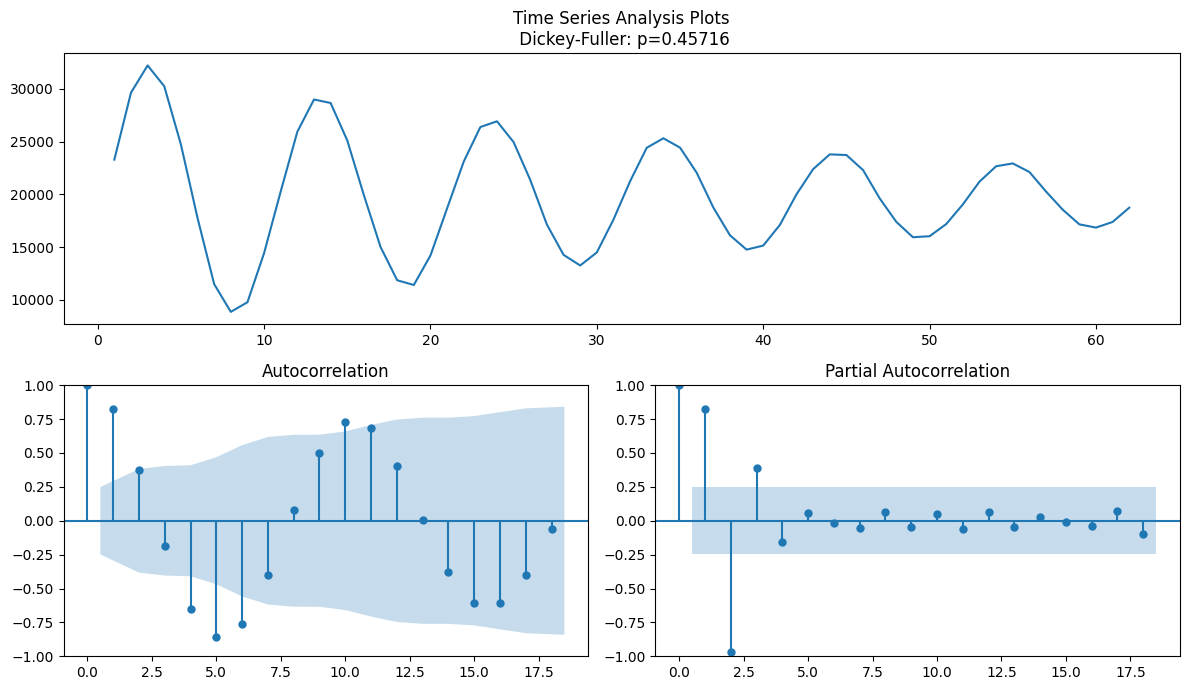

In [54]:
tsplot(df_new['time_diff'])

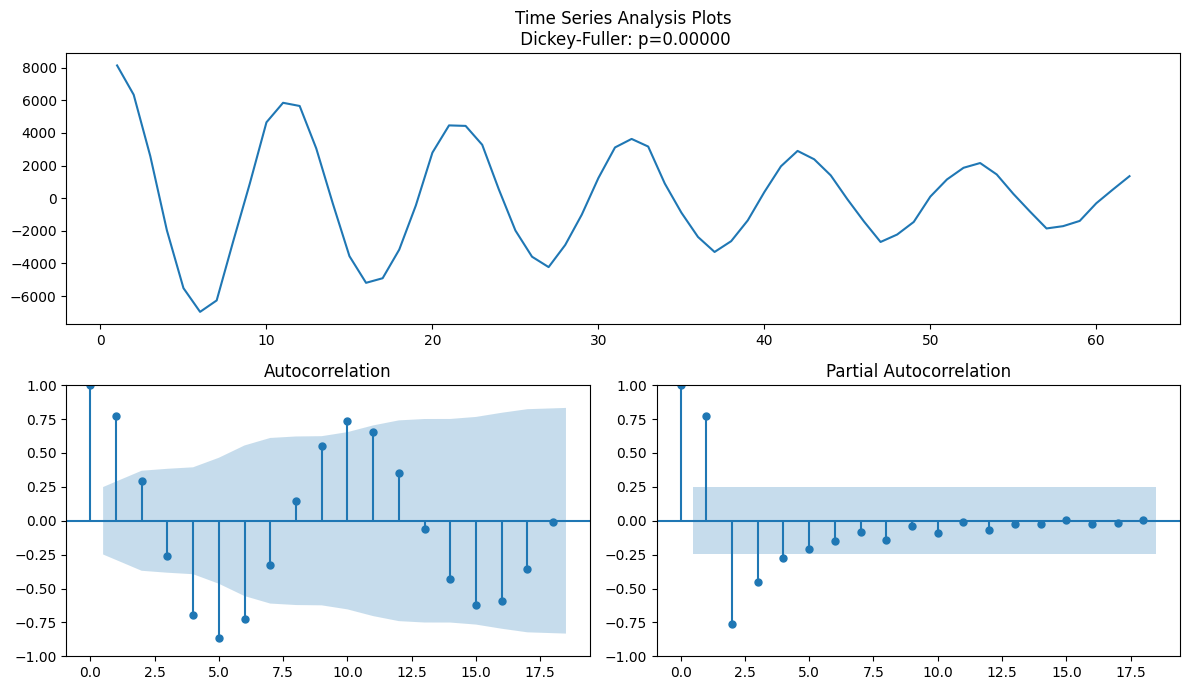

In [55]:
tsplot(df_new['newdiff'])

p os ARIMA taken as 4 because of partial autocorelation graph going in shaded area.

## Model Training

p=4, d=1 decided using analysis above

In [56]:
!pip install pmdarima


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
# Split the data into train-test and train daywise prediction model for number of vehicles using arima
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_dropped, test_size=0.15, shuffle=False)

from statsmodels.tsa.arima.model import ARIMA
print("started")
model = ARIMA(train['time_diff'], order=(4,1,1))
print("started")
model_fit = model.fit()

started
started


c:\Users\Maadurga computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 3.2615904335937564
MASE: 0.11765051133910737
R-squared: 0.8535236505869301


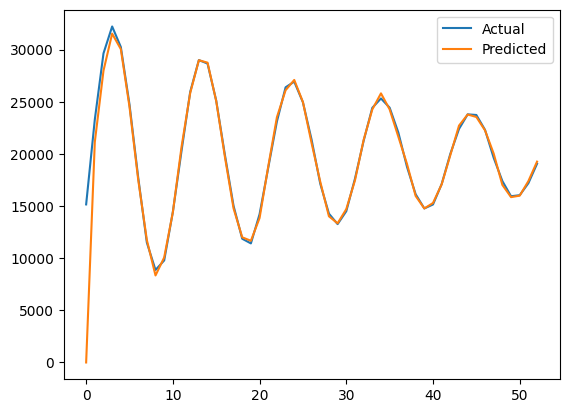

In [58]:
# TRAIN prediction plot
predictions = model_fit.predict(start=train.index[0], end=train.index[-1])

# Find mape on predicited values
mape = np.mean(np.abs((train['time_diff'].values - predictions) / train['time_diff'].values)) * 100
print('MAPE:', mape)

# Find MASE
mae_train = np.mean(np.abs(train['time_diff'].values - predictions))
naive_forecast = np.mean(train['time_diff'].values)
mae_naive = np.mean(np.abs(train['time_diff'].values - naive_forecast))
mase_train = mae_train / mae_naive
print('MASE:', mase_train)

# Find R-squared
r2 = 1 - np.sum((train['time_diff'].values - predictions) ** 2) / np.sum((train['time_diff'].values - np.mean(train['time_diff'].values)) ** 2)
print('R-squared:', r2)

plt.plot(train['time_diff'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

MAPE: 1.7438675073811187
MASE: 0.16960104742187995
R-squared: 0.9738758389460883


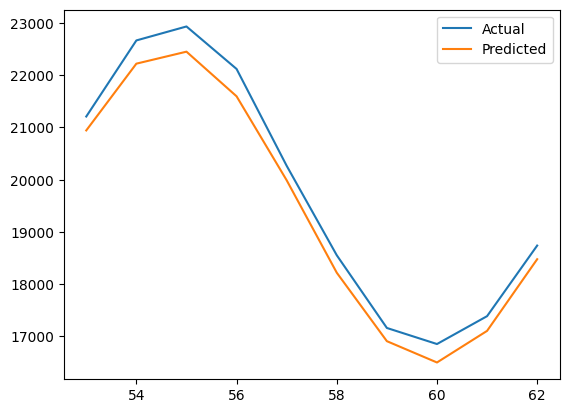

In [59]:
# Test prediction plot
predictions = model_fit.predict(start=test.index[0], end=test.index[-1])

# Find mape on predicited values
mape = np.mean(np.abs((test['time_diff'].values - predictions) / test['time_diff'].values)) * 100
print('MAPE:', mape)

# Find MASE
mae_test = np.mean(np.abs(test['time_diff'].values - predictions))
naive_forecast = np.mean(test['time_diff'].values)
mae_naive = np.mean(np.abs(test['time_diff'].values - naive_forecast))
mase_test = mae_test / mae_naive
print('MASE:', mase_test)

# Find R-squared
r2 = 1 - np.sum((test['time_diff'].values - predictions) ** 2) / np.sum((test['time_diff'].values - np.mean(test['time_diff'].values)) ** 2)
print('R-squared:', r2)

plt.plot(test['time_diff'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

We can see the test results are pretty good. We can now use this to forecast average time spent by a vehicle in a day, for the next 7 days.

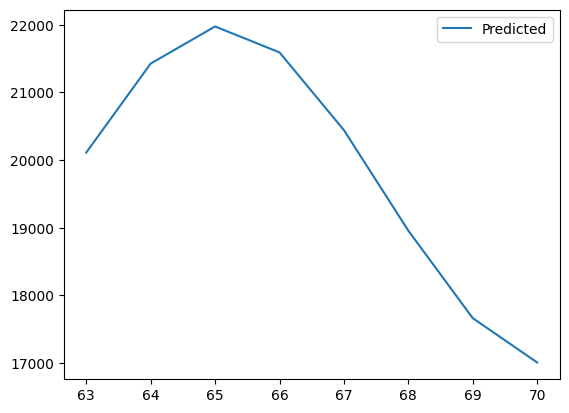

63    20111.400325
64    21426.349091
65    21974.623763
66    21591.376796
67    20442.635944
68    18956.165159
69    17662.803518
70    17007.618942
Name: predicted_mean, dtype: float64

In [60]:
final_predictions = model_fit.predict(start=63, end=70)
plt.plot(final_predictions, label='Predicted')
plt.legend()
plt.show()
final_predictions